In [1]:
from sympy import *
init_printing()
from IPython.display import display
from sympy.functions import Abs

## Problema 3

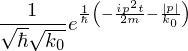

True

In [2]:
p,x,k = symbols('p x k',\
                       real=True)
s, h, m, t, k0, p1 = symbols('sigma hbar m t k_0 p_1', real=True, \
           positive=True)
mom_repr = nsimplify(exp(-Abs(p)/(h*k0)))
Nsq=integrate(mom_repr*mom_repr, (p,-oo,oo), conds='none')
mom_repr/=sqrt(Nsq)

mom_repr_t = exp(-I*(p**2/(2*m))*t/h)*mom_repr
display(simplify(mom_repr_t))
abs(mom_repr)**2==abs(mom_repr_t)**2

In [3]:
P_p1 = 2*integrate(exp(-2*p/(h*k0))/Nsq, (p, 0, p1), conds='none')
pl=plot(P_p1.subs(h,1).subs(k0,1), xlim=(-2,5), ylim=(-1,1))
display(P_p1)


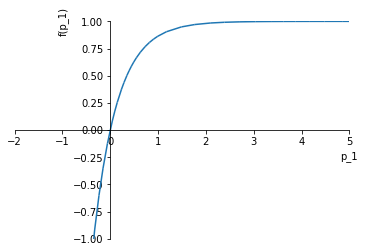

In [ ]:
pl.show()

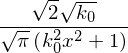

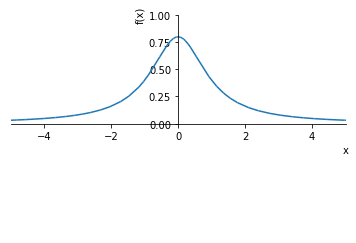

In [4]:
pos_repr = (1/sqrt(2*pi*h))*integrate(simplify(mom_repr*exp(I*p*x/h)), (p,-oo,oo), conds='none')
display(simplify(cancel(pos_repr)))
Nsq = integrate(abs(pos_repr)**2, (x,-oo,oo), conds='none')
pos_repr/=sqrt(Nsq)
pt=plot(simplify(pos_repr.subs(k0,1)), xlim=(-5,5), ylim=(-1,1))

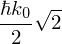

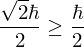

In [5]:
delta_p_sq = integrate(mom_repr*mom_repr*p**2, (p,-oo,oo), conds='none')
avg_p = integrate(mom_repr*mom_repr*p, (p,-oo,oo), conds='none')
display(avg_p)
delta_x_sq = integrate(pos_repr*pos_repr*x**2, (x,-oo,oo), conds='none')
display(sqrt(delta_x_sq), sqrt(delta_p_sq))
sqrt(delta_x_sq*delta_p_sq)>=h/2

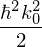

In [6]:
delta_p_t_sq = integrate(Abs(mom_repr_t)**2*p**2, (p,-oo,oo), conds='none')
display(delta_p_t_sq)

# Punto 14

In [7]:
from sympy.physics.matrices import msigma
a,b, w = symbols('a b omega_0', real=True)
H = h*w*diag(1, 2, 2)
A = a*diag(1,msigma(1))
B = b*diag(msigma(1), 1)


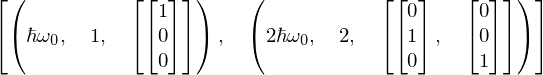

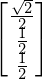

'avg E'

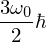

'delta E'

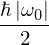

In [8]:
display(H.eigenvects())
Psi_0 = nsimplify(1/sqrt(2))*H.eigenvects()[0][2][0]+nsimplify(0.5)*H.eigenvects()[1][2][0]+nsimplify(0.5)*H.eigenvects()[1][2][1]
display(Psi_0)
display('avg E', nsimplify(0.5*H.eigenvects()[0][0] + 2*0.25*H.eigenvects()[1][0]))

display('delta E', sqrt(simplify(nsimplify(0.5*H.eigenvects()[0][0]**2 + 2*0.25*H.eigenvects()[1][0]**2))-\
       nsimplify(0.5*H.eigenvects()[0][0] + 2*0.25*H.eigenvects()[1][0])**2))

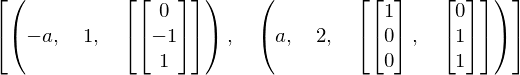

In [9]:
A.eigenvects()
#Note que los vectores propios de A son u1 (vp a), N*(u2+u3) (vp a) y N*(-u2+u3) (vp -a)

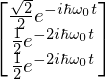

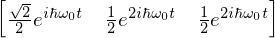

In [10]:
Psi_t = Matrix([[exp(-I*t*H.eigenvects()[0][0])*Psi_0[0]],\
                [exp(-I*t*H.eigenvects()[1][0])*Psi_0[1]],[exp(-I*t*H.eigenvects()[1][0])*Psi_0[2]]])
display(Psi_t)
Psi_t_T = adjoint(Psi_t)
display(Psi_t_T)

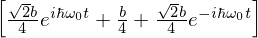

In [11]:
display(Psi_t_T*A*Psi_t)
display(Psi_t_T*B*Psi_t)

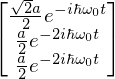

In [12]:
simplify((A*Psi_t)) #Se mide a, note que A*Psi_t = a* Psi_t

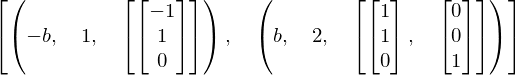

In [13]:
B.eigenvects()

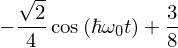

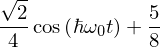

In [14]:
#Medir -b
display(simplify((abs((nsimplify(1/sqrt(2))*adjoint(B.eigenvects()[0][2][0])*Psi_t)[0])**2).rewrite(cos)))
#Medir b
display(simplify((abs(nsimplify(1/sqrt(2))*adjoint(B.eigenvects()[1][2][0])\
                     *Psi_t)[0]**2+abs(adjoint(B.eigenvects()[1][2][1])*Psi_t)[0]**2).rewrite(cos)))
